# importando base de dados

In [10]:
import pandas as pd


In [11]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [12]:
dados = pd.read_csv('tips.csv')

In [13]:
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


# traduzindo 

In [14]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [15]:
gorjetas = dados.rename(columns = renomear)

In [16]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [18]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [19]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [28]:
dia_da_semana = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [29]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia_da_semana)

In [26]:
hora_do_dia = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [31]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora_do_dia)

In [32]:

gorjetas


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


In [33]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [34]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

# importando seaborn


In [35]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 5.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [36]:
import seaborn as sns

In [37]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.8/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


# analise 1 - valor da conta e gorjeta 

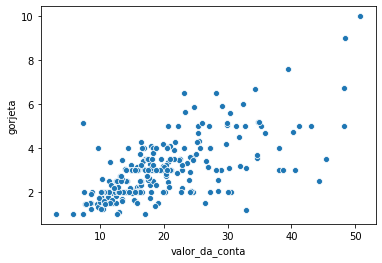

In [39]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [44]:
print(f'a base de dados contem {gorjetas.shape[0]} registro')
print(f'registro nao nulos')
gorjetas.count()

a base de dados contem 244 registro
registro nao nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## craindo o campo porcentagem

In [45]:
gorjetas['porcentagem'] = gorjetas.gorjeta / gorjetas.valor_da_conta

In [46]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.203927
240,27.18,2.00,Sim,Sábado,Jantar,2,0.073584
241,22.67,2.00,Sim,Sábado,Jantar,2,0.088222
242,17.82,1.75,Não,Sábado,Jantar,2,0.098204


In [47]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [50]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07
241,22.67,2.00,Sim,Sábado,Jantar,2,0.09
242,17.82,1.75,Não,Sábado,Jantar,2,0.10


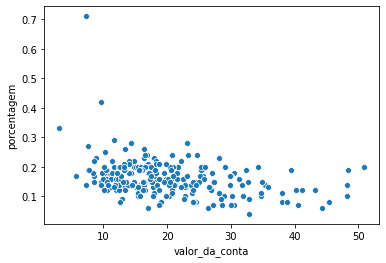

In [53]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**o valor da conta nao eh proporcional ao valor da gorjeta**

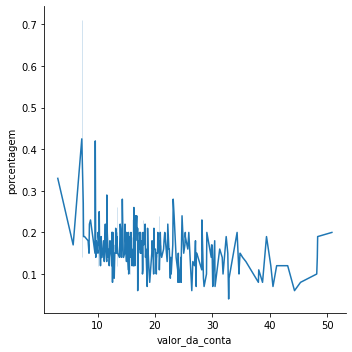

In [56]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

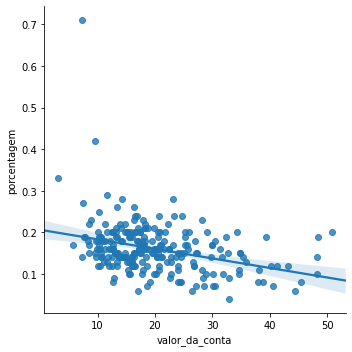

In [57]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)